In [2]:
import os

import warnings 
warnings.filterwarnings('ignore')


# for data analytics
import pandas as pd
import numpy as np
from collections import Counter

# for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

# # For entropy computation
# from pyitlib import discrete_random_variable as drv

from scipy import stats
import missingno
from sklearn import preprocessing

# TEXT EDA
# from wordcloud import WordCloud

# import spacy
# from spacy.lang.en.stop_words import STOP_WORDS
# from spacy.lang.en import English

import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 100
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
import ast

In [95]:
def read_file():
    full_data = pd.DataFrame()
    for file in os.listdir():
        if 'compiled' in file:
            data = pd.read_csv(file, index_col = 0)
            full_data = full_data.append(data)
    return full_data

In [96]:
data = read_file()

## General counts

In [97]:
data

,url,name,neighbourhood,price,categories,review,user,date
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm
...,...,...,...,...,...,...,...,...
26,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020"
27,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020"
28,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020"
29,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020"


In [98]:
# Total Number of restaurant reviews
print(f'No. reviews: {len(data)}')
# Number of restaurants with reviews
num = len(data['url'].unique())
print(f'No. restaurants: {num}')

No. reviews: 6528650
No. restaurants: 863


## Clean Cost Column 

In [99]:
data['cleaned_price'] = data['price'].apply(lambda x: int(x.split('/')[0].replace('~$','')) if '$' in x else np.nan)
data.head(3)

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0


## Clean Categories

In [100]:
category_mapping = {'Steak':['Western'], 
 'Cocktails':['Alcohol','Drinks'], 
 'Great View': ['Good Environment'], 
 'Sushi':['Japanese'], 
 'Ramen':['Japanese','Noodles'], 
 'Islandwide Delivery':['Delivery'], 
 'Craft Beer':['Drinks','Alcohol'], 
 '1 For 1 Deals':['Value'],
 'Teppanyaki':['Japanese'], 
 'Sustainable Dining on Beyond':['Sustainable'], 
 'Vegan friendly':['Sustainable'], 
 'Kopitiam':['Local Delights'], 
 'Char Kway Teow':['Local Delights','Noodles','Chinese'], 
 'Taiwanese':['Chinese'], 
 'Waffles':['Desserts'], 
 'Zi Char':['Local Delights','Chinese'], 
 'Fruit Tea':['Drinks'], 
 'Pasta':['Western','Noodles'], 
 'Vouchers':['Value'], 
 'Chirashi':['Japanese'], 
 'Bars':['Alcohol','Drinks'], 
 'Burpple Beyond Deals 💰':['Value'], 
 'BITES':['Bites'],
 'Burpple Guides':['Recommended'],
 'Michelin Guide Singapore 2018':['Recommended'],
'Grill & BBQ':['Western','BBQ'], 
'Bread & Pastries':['Desserts','High Tea', 'Breakfast & Brunch'], 
 'Vegetarian friendly':['Sustainable'], 
 'Cheap & Good':['Value'], 
 'Mediterranean':['Middle Eastern'], 
 'Michelin Guide Singapore 2017':['Recommended'], 
 'Hawker Food':['Local Delights'], 
 'Ice Cream & Yoghurt':['Desserts'], 
 'Cafes & Coffee':['Desserts','High Tea', 'Breakfast & Brunch'], 
 'Interesting':['Good Environment'],
'Dinner with Drinks':['Drinks'], 
'Bak Kut Teh':['Local Delights', 'Chinese'],
'Burgers':['Western'],
'Korean Desserts': ['Desserts','Korean'],
 'Vegetarian':['Sustainable'], 
 'Nasi Lemak':['Malay','Local Delights'], 
 'Salads':['Western'], 
'TAKEAWAY OPTION':['Convenient'],
'Delivery':['Convenient'], 
'Sandwiches':['High Tea', 'Breakfast & Brunch', 'Western'], 
'Pizza':['Western'],
'Vegan':['Sustainable'], 
'Dim Sum':['Chinese'], 
'Chicken Rice':['Local Delights','Chinese'], 
'Fried Chicken':['Korean', 'Western', 'Bites','Fast Food'], 
'Korean BBQ':['Korean','BBQ'],
'Filipino Local Delights':['Filipino'], 
'Cakes':['Desserts','High Tea'], 
'Michelin Guide Singapore 2019':['Recommended'],
 'Korean Fried Chicken':['Korean','Bites','Fast Food'], 
'Hot Pot': ['Chinese', 'Rainy Day Comforts'], 
'Late Night':['Supper'],
 'Bubble Tea':['Drinks'],
 'BEYOND': ['Recommended', 'Value']
 }

In [101]:
# find unique categories 
def find_unique_categories(category_col_name, data):
    all_categories = []
    for categories in data[category_col_name]:
        try:
            all_categories.extend(ast.literal_eval(categories))
        except:
            all_categories.extend(categories)
    print(f'Num of Categories:{len(set(all_categories))}')
    for i in set(all_categories):
        print(i)
    return list(set(all_categories))
    

In [9]:
find_unique_categories('categories', data)

Num of Categories:101
Burgers
Vietnamese
Hidden Gem
Bites
Zi Char
Fried Chicken
Spanish
Korean
Peranakan
Ice Cream & Yoghurt
Indonesian
Supper
Korean BBQ
Korean Fried Chicken
Teppanyaki
Cheap & Good
Sustainable Dining on Beyond
Malay
Vegetarian
Pizza
Cakes
French
Turkish
BEYOND
Bubble Tea
Steak
Vegetarian friendly
High Tea
Newly Opened
Soup
Dinner with Drinks
Mexican
Sandwiches
Italian
Nasi Lemak
Filipino Local Delights
Buffets
Craft Beer
Burpple Guides
BITES
Salads
Hawker Food
Thai
Pet-Friendly
Late Night
Vegan friendly
Vouchers
Fine Dining
TAKEAWAY OPTION
Islandwide Delivery
Burpple Beyond Deals 💰
BBQ
Healthy
Cocktails
Greek
Michelin Guide Singapore 2017
1 For 1 Deals
Desserts
Dim Sum
Bak Kut Teh
Middle Eastern
Cafes & Coffee
Russian
Waffles
Western
Noodles
Char Kway Teow
Mediterranean
Breakfast & Brunch
Date Night
Michelin Guide Singapore 2019
Seafood
Chicken Rice
Taiwanese
Japanese
Pasta
Rainy Day Comforts
Vegan
Local Delights
Chinese
Michelin Guide Singapore 2018
Great View
Fast F

In [102]:
# map categories
all_new_categories = []
for idx, row in data.iterrows():
    categories = ast.literal_eval(row['categories'])
    new_categories = []
    for category in categories:
        if category in category_mapping.keys():
            new_categories.extend(category_mapping[category])
        else:
            new_categories.append(category)
    all_new_categories.append(new_categories)

data['cleaned_categories'] = all_new_categories

In [10]:
# find unique categories after mapping
list_cleaned_categories = find_unique_categories('cleaned_categories', data)

Num of Categories:51
Argentinian
Noodles
Good Environment
Drinks
Halal
Soup
Thai
Bites
Pet-Friendly
Western
Vietnamese
Rainy Day Comforts
Breakfast & Brunch
Indonesian
Peranakan
Middle Eastern
Alcohol
Hidden Gem
Fast Food
High Tea
Delivery
Russian
Good For Groups
Korean
Turkish
Buffets
Greek
Indian
European
BBQ
Sustainable
Supper
Newly Opened
Convenient
Fine Dining
Japanese
Italian
Chinese
Value
Date Night
Mexican
Spanish
French
Malay
Recommended
Kid Friendly
Desserts
Healthy
Filipino
Local Delights
Seafood


## Check for null values

In [103]:
# Check if there is any null value
data.isna().apply(pd.value_counts)

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories
False,6528650.0,6528650.0,6528561,6528650.0,6528650.0,6528650.0,6528650.0,6528650.0,6526869,6528650.0
True,NaN,NaN,89,NaN,NaN,NaN,NaN,NaN,1781,NaN


In [104]:
# 89 reviews have no neighbourhood. Thus, we drop these reviews.
cleaned_data = data[~data['neighbourhood'].isna()]

# 1781 reviews have no price. Thus, we drop these reviews.
cleaned_data = data[~data['cleaned_price'].isna()]

In [105]:
# Total Number of restaurant reviews
print(f'No. reviews: {len(cleaned_data)}')
# Number of restaurants with reviews
num = len(cleaned_data['url'].unique())
print(f'No. restaurants: {num}')

No. reviews: 6526869
No. restaurants: 845


## Convert Cat Variables to Binary Variables

In [106]:
list_cleaned_categories = find_unique_categories('cleaned_categories', cleaned_data)
list_cleaned_categories

Num of Categories:51
Argentinian
Noodles
Good Environment
Drinks
Halal
Soup
Thai
Bites
Pet-Friendly
Western
Vietnamese
Rainy Day Comforts
Breakfast & Brunch
Indonesian
Peranakan
Middle Eastern
Alcohol
Hidden Gem
Fast Food
High Tea
Delivery
Russian
Good For Groups
Korean
Turkish
Buffets
Greek
Indian
European
BBQ
Sustainable
Supper
Newly Opened
Convenient
Fine Dining
Japanese
Italian
Chinese
Value
Date Night
Mexican
Spanish
French
Malay
Recommended
Kid Friendly
Desserts
Healthy
Filipino
Local Delights
Seafood


['Argentinian',
 'Noodles',
 'Good Environment',
 'Drinks',
 'Halal',
 'Soup',
 'Thai',
 'Bites',
 'Pet-Friendly',
 'Western',
 'Vietnamese',
 'Rainy Day Comforts',
 'Breakfast & Brunch',
 'Indonesian',
 'Peranakan',
 'Middle Eastern',
 'Alcohol',
 'Hidden Gem',
 'Fast Food',
 'High Tea',
 'Delivery',
 'Russian',
 'Good For Groups',
 'Korean',
 'Turkish',
 'Buffets',
 'Greek',
 'Indian',
 'European',
 'BBQ',
 'Sustainable',
 'Supper',
 'Newly Opened',
 'Convenient',
 'Fine Dining',
 'Japanese',
 'Italian',
 'Chinese',
 'Value',
 'Date Night',
 'Mexican',
 'Spanish',
 'French',
 'Malay',
 'Recommended',
 'Kid Friendly',
 'Desserts',
 'Healthy',
 'Filipino',
 'Local Delights',
 'Seafood']

In [107]:
# append empty columns with category names
cleaned_data = cleaned_data.reindex(cleaned_data.columns.tolist() + list_cleaned_categories, axis=1)

In [108]:
for category in list_cleaned_categories:
    print(category)
    cleaned_data[category] = cleaned_data['cleaned_categories'].apply(lambda x: 1 if category in x else 0)

Argentinian
Noodles
Good Environment
Drinks
Halal
Soup
Thai
Bites
Pet-Friendly
Western
Vietnamese
Rainy Day Comforts
Breakfast & Brunch
Indonesian
Peranakan
Middle Eastern
Alcohol
Hidden Gem
Fast Food
High Tea
Delivery
Russian
Good For Groups
Korean
Turkish
Buffets
Greek
Indian
European
BBQ
Sustainable
Supper
Newly Opened
Convenient
Fine Dining
Japanese
Italian
Chinese
Value
Date Night
Mexican
Spanish
French
Malay
Recommended
Kid Friendly
Desserts
Healthy
Filipino
Local Delights
Seafood


## Mapping Neighbourhoods to Regions

In [5]:
neighbourhood_to_region_mapping = pd.read_excel('neighbourhood_to_region_mapping.xlsx')
neighbourhood_to_region_mapping['neighbourhood'] = neighbourhood_to_region_mapping['neighbourhood'].apply(lambda x: x.replace('\xa0',''))
neighbourhood_to_region_mapping = neighbourhood_to_region_mapping.set_index('neighbourhood').T.to_dict('records')[0]

In [6]:
cleaned_data['region'] = cleaned_data['neighbourhood'].apply(lambda x: neighbourhood_to_region_mapping[x])

In [7]:
cleaned_data

,Unnamed: 0,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,...,French,Malay,Recommended,Kid Friendly,Desserts,Healthy,Filipino,Local Delights,Seafood,region
0,0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,...,0,0,0,0,0,0,0,1,0,East
1,1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,...,0,0,0,0,0,0,0,1,0,East
2,2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,...,0,0,0,0,0,0,0,1,0,East
3,3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,...,0,0,0,0,0,0,0,1,0,East
4,4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,...,0,0,0,0,0,0,0,1,0,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6526864,26,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,...,0,0,0,0,0,0,0,0,0,Central
6526865,27,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,...,0,0,0,0,0,0,0,0,0,Central
6526866,28,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,...,0,0,0,0,0,0,0,0,0,Central
6526867,29,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,...,0,0,0,0,0,0,0,0,0,Central


In [8]:
cleaned_data.to_csv('cleaned_restaurant_reviews.csv')

## Categorical EDA

In [152]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,French,Malay,Recommended,Kid Friendly,Desserts,Healthy,Filipino,Local Delights,Seafood,region
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,1,0,East
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,1,0,East
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,1,0,East
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,1,0,East
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,1,0,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,0,0,0,0,0,Central
27,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,0,0,0,0,0,Central
28,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,0,0,0,0,0,Central
29,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,0,0,0,0,0,Central


Pie Chart of restaurants/reviews by neighbourhood - if got too many cats we do bar chart DONE
Bar chart by restaurants/reviews by category (might not sum to 100 bc 1 restaurant can be in multiple categories)
Histogram of number of reviews for each restaurant -> 10-20 reviews (10 rest), 20-30 reviews (20 rest)
Box and whiskers plot for price data 
Normal distribution chart for price data 
Number of reviews per date
Word Cloud for all reviews

#### Bar Chart of Restaurants by Neighbourhood

In [223]:
num_rest_by_neighbourhood_East = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'East'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_Central = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'Central'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_West = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'West'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_NE = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North East'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_North = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_South = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'South'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')

Text(0.5, 1.0, 'South')

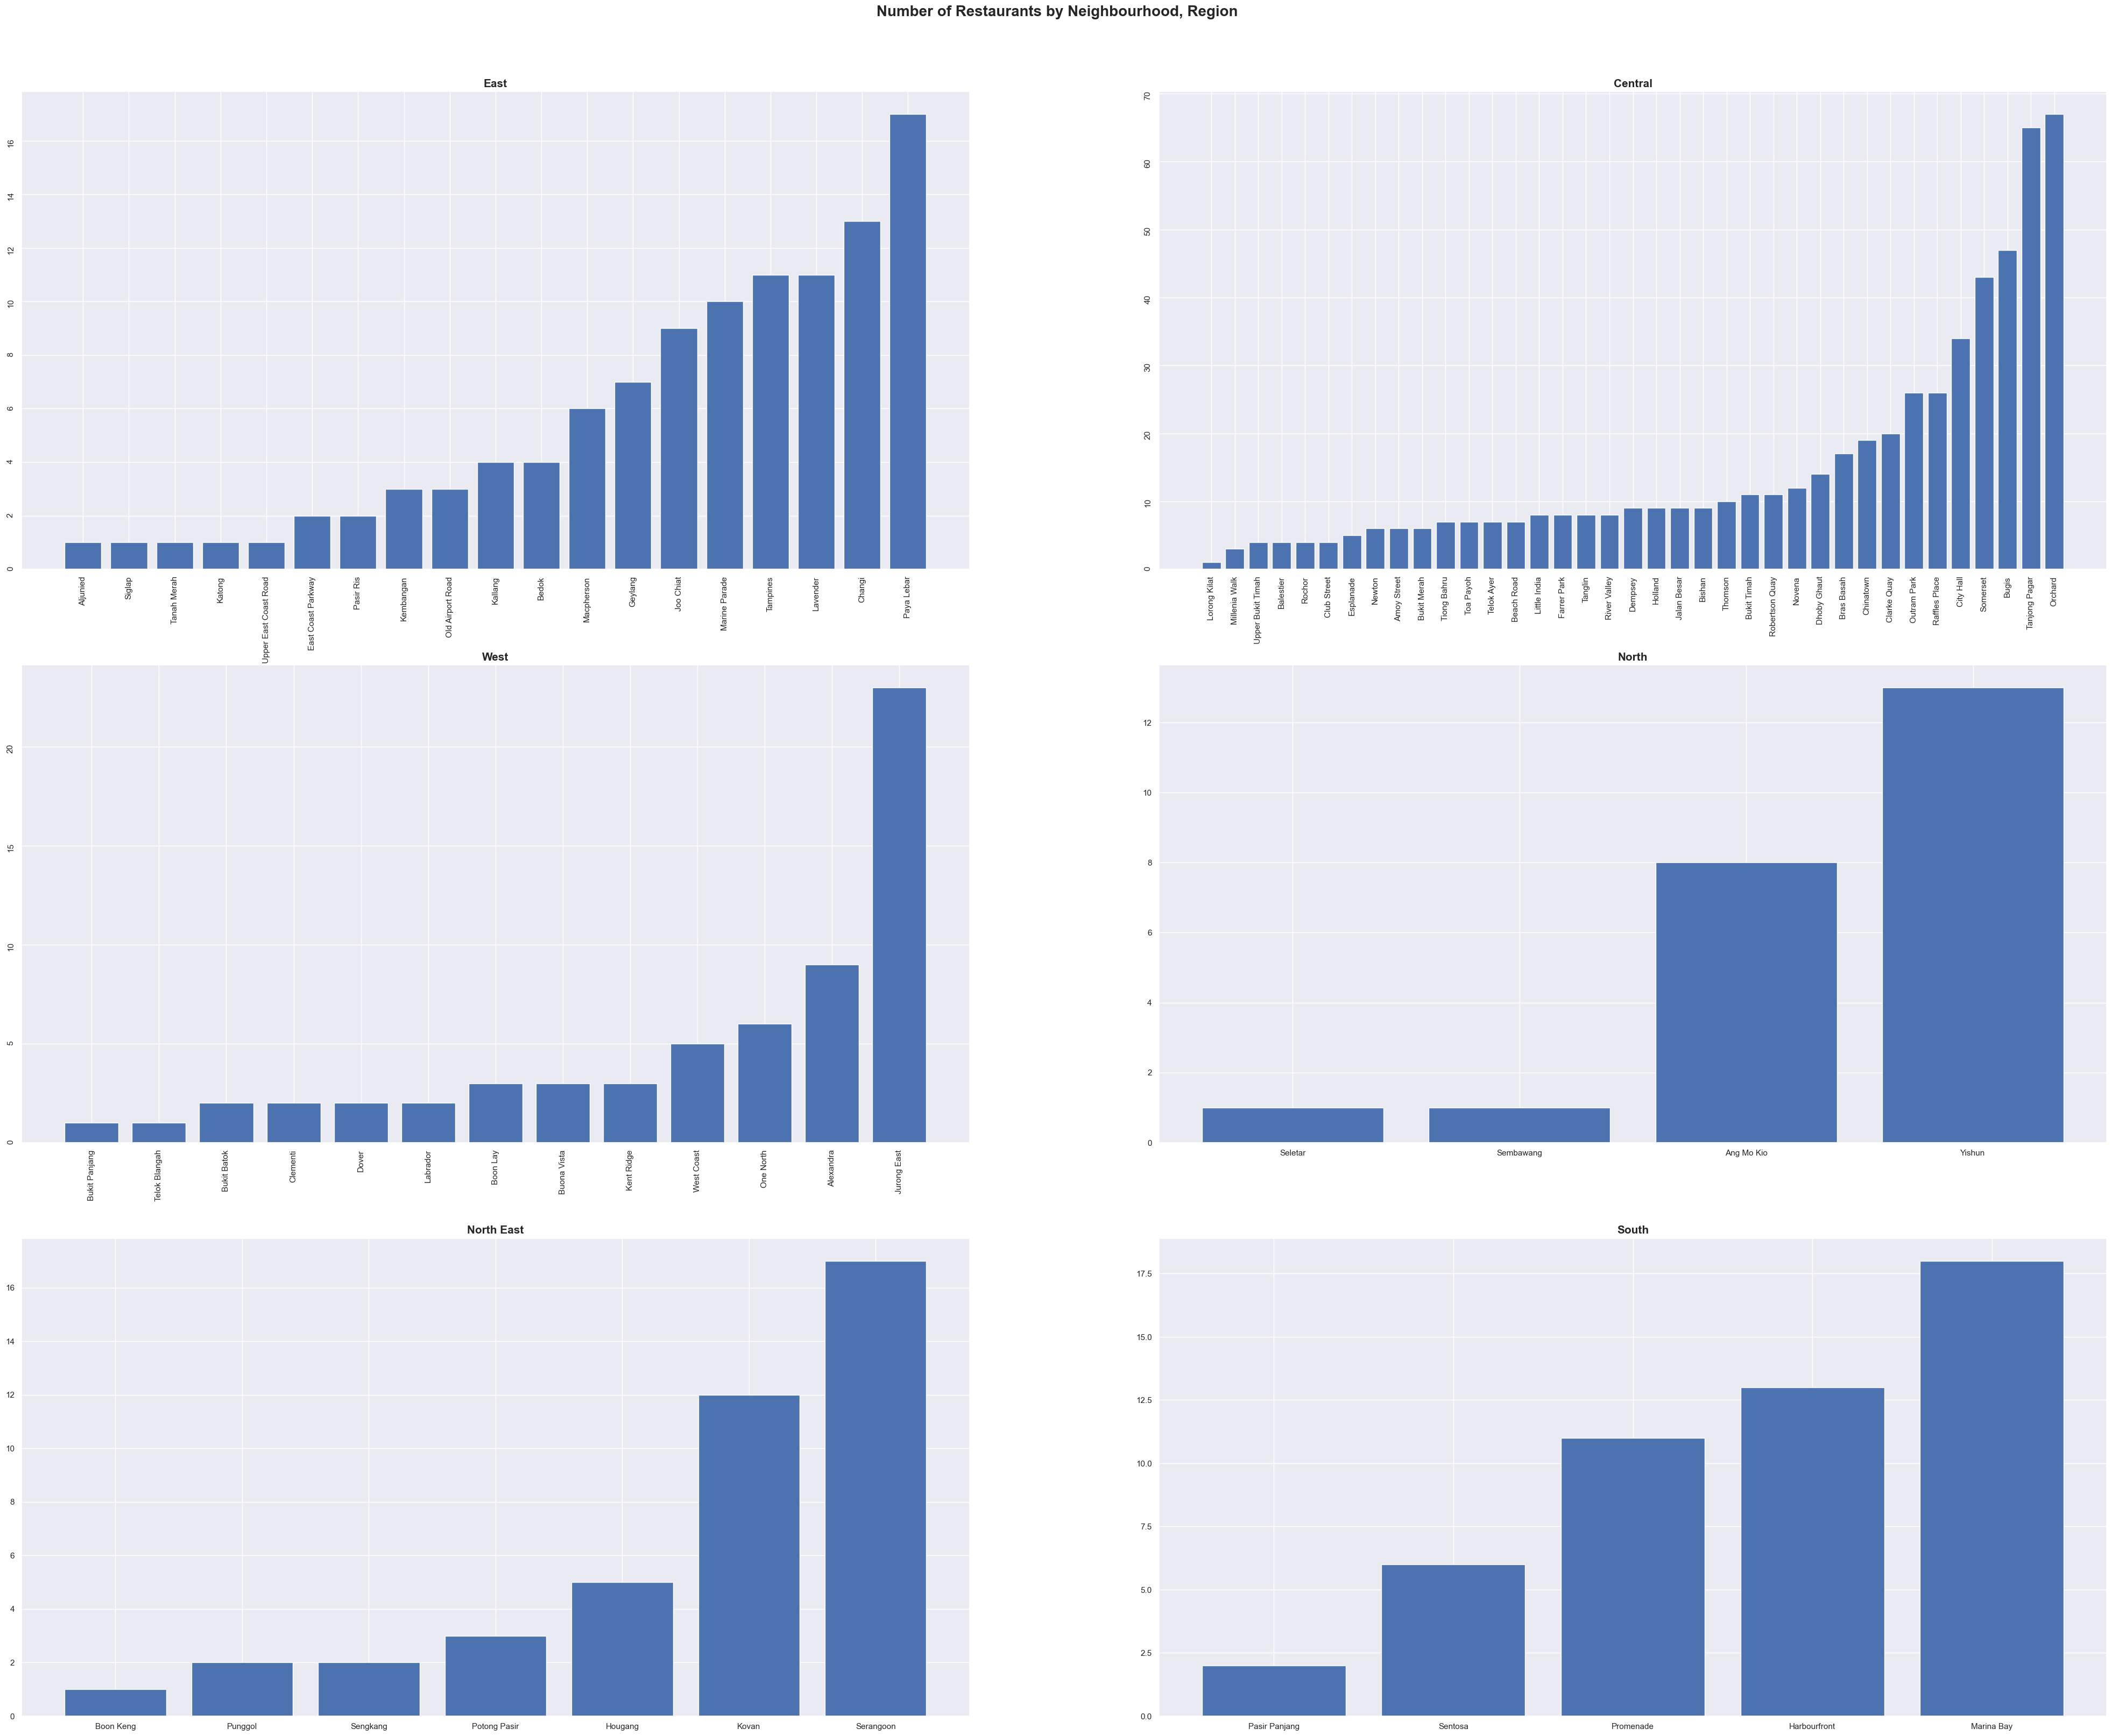

In [224]:

fig, axs = plt.subplots(3,2, figsize=(50, 40))
axs[0][0].bar(num_rest_by_neighbourhood_East['neighbourhood'], num_rest_by_neighbourhood_East['url'])
axs[0][1].bar(num_rest_by_neighbourhood_Central['neighbourhood'], num_rest_by_neighbourhood_Central['url'])
axs[1][0].bar(num_rest_by_neighbourhood_West['neighbourhood'], num_rest_by_neighbourhood_West['url'])
axs[1][1].bar(num_rest_by_neighbourhood_North['neighbourhood'], num_rest_by_neighbourhood_North['url'])
axs[2][0].bar(num_rest_by_neighbourhood_NE['neighbourhood'], num_rest_by_neighbourhood_NE['url'])
axs[2][1].bar(num_rest_by_neighbourhood_South['neighbourhood'], num_rest_by_neighbourhood_South['url'])

fig.suptitle('Number of Restaurants by Neighbourhood, Region', fontsize=20, fontweight='extra bold', y=0.92, x=0.51)
axs[0][0].set_title('East', fontsize=15, fontweight='bold')
axs[0][0].tick_params(labelrotation = 90)

axs[0][1].set_title('Central', fontsize=15, fontweight='bold')
axs[0][1].tick_params(labelrotation = 90)

axs[1][0].set_title('West', fontsize=15, fontweight='bold')
axs[1][0].tick_params(labelrotation = 90)

axs[1][1].set_title('North', fontsize=15, fontweight='bold')
axs[2][0].set_title('North East', fontsize=15, fontweight='bold')
axs[2][1].set_title('South', fontsize=15, fontweight='bold')


#### Bar Chart of Restaurants by Region

In [225]:
num_rest_by_region = pd.DataFrame(cleaned_data.groupby('region')['url'].nunique()).reset_index().sort_values('url')

Text(0.5, 1.0, 'Number of Restaurants by Region')

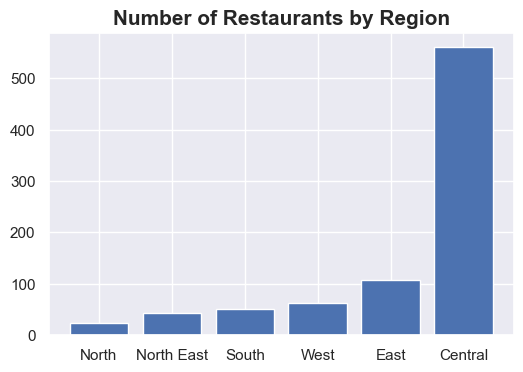

In [226]:
plt.bar(num_rest_by_region['region'],num_rest_by_region['url'])
plt.title('Number of Restaurants by Region', fontsize=15, fontweight='bold')

#### Bar Chart of Reviews by Neighbourhood

In [227]:
num_reviews_by_neighbourhood_East = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'East'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_Central = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'Central'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_West = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'West'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_North= pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_NE = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North East'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_South = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'South'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')

Text(0.5, 1.0, 'South')

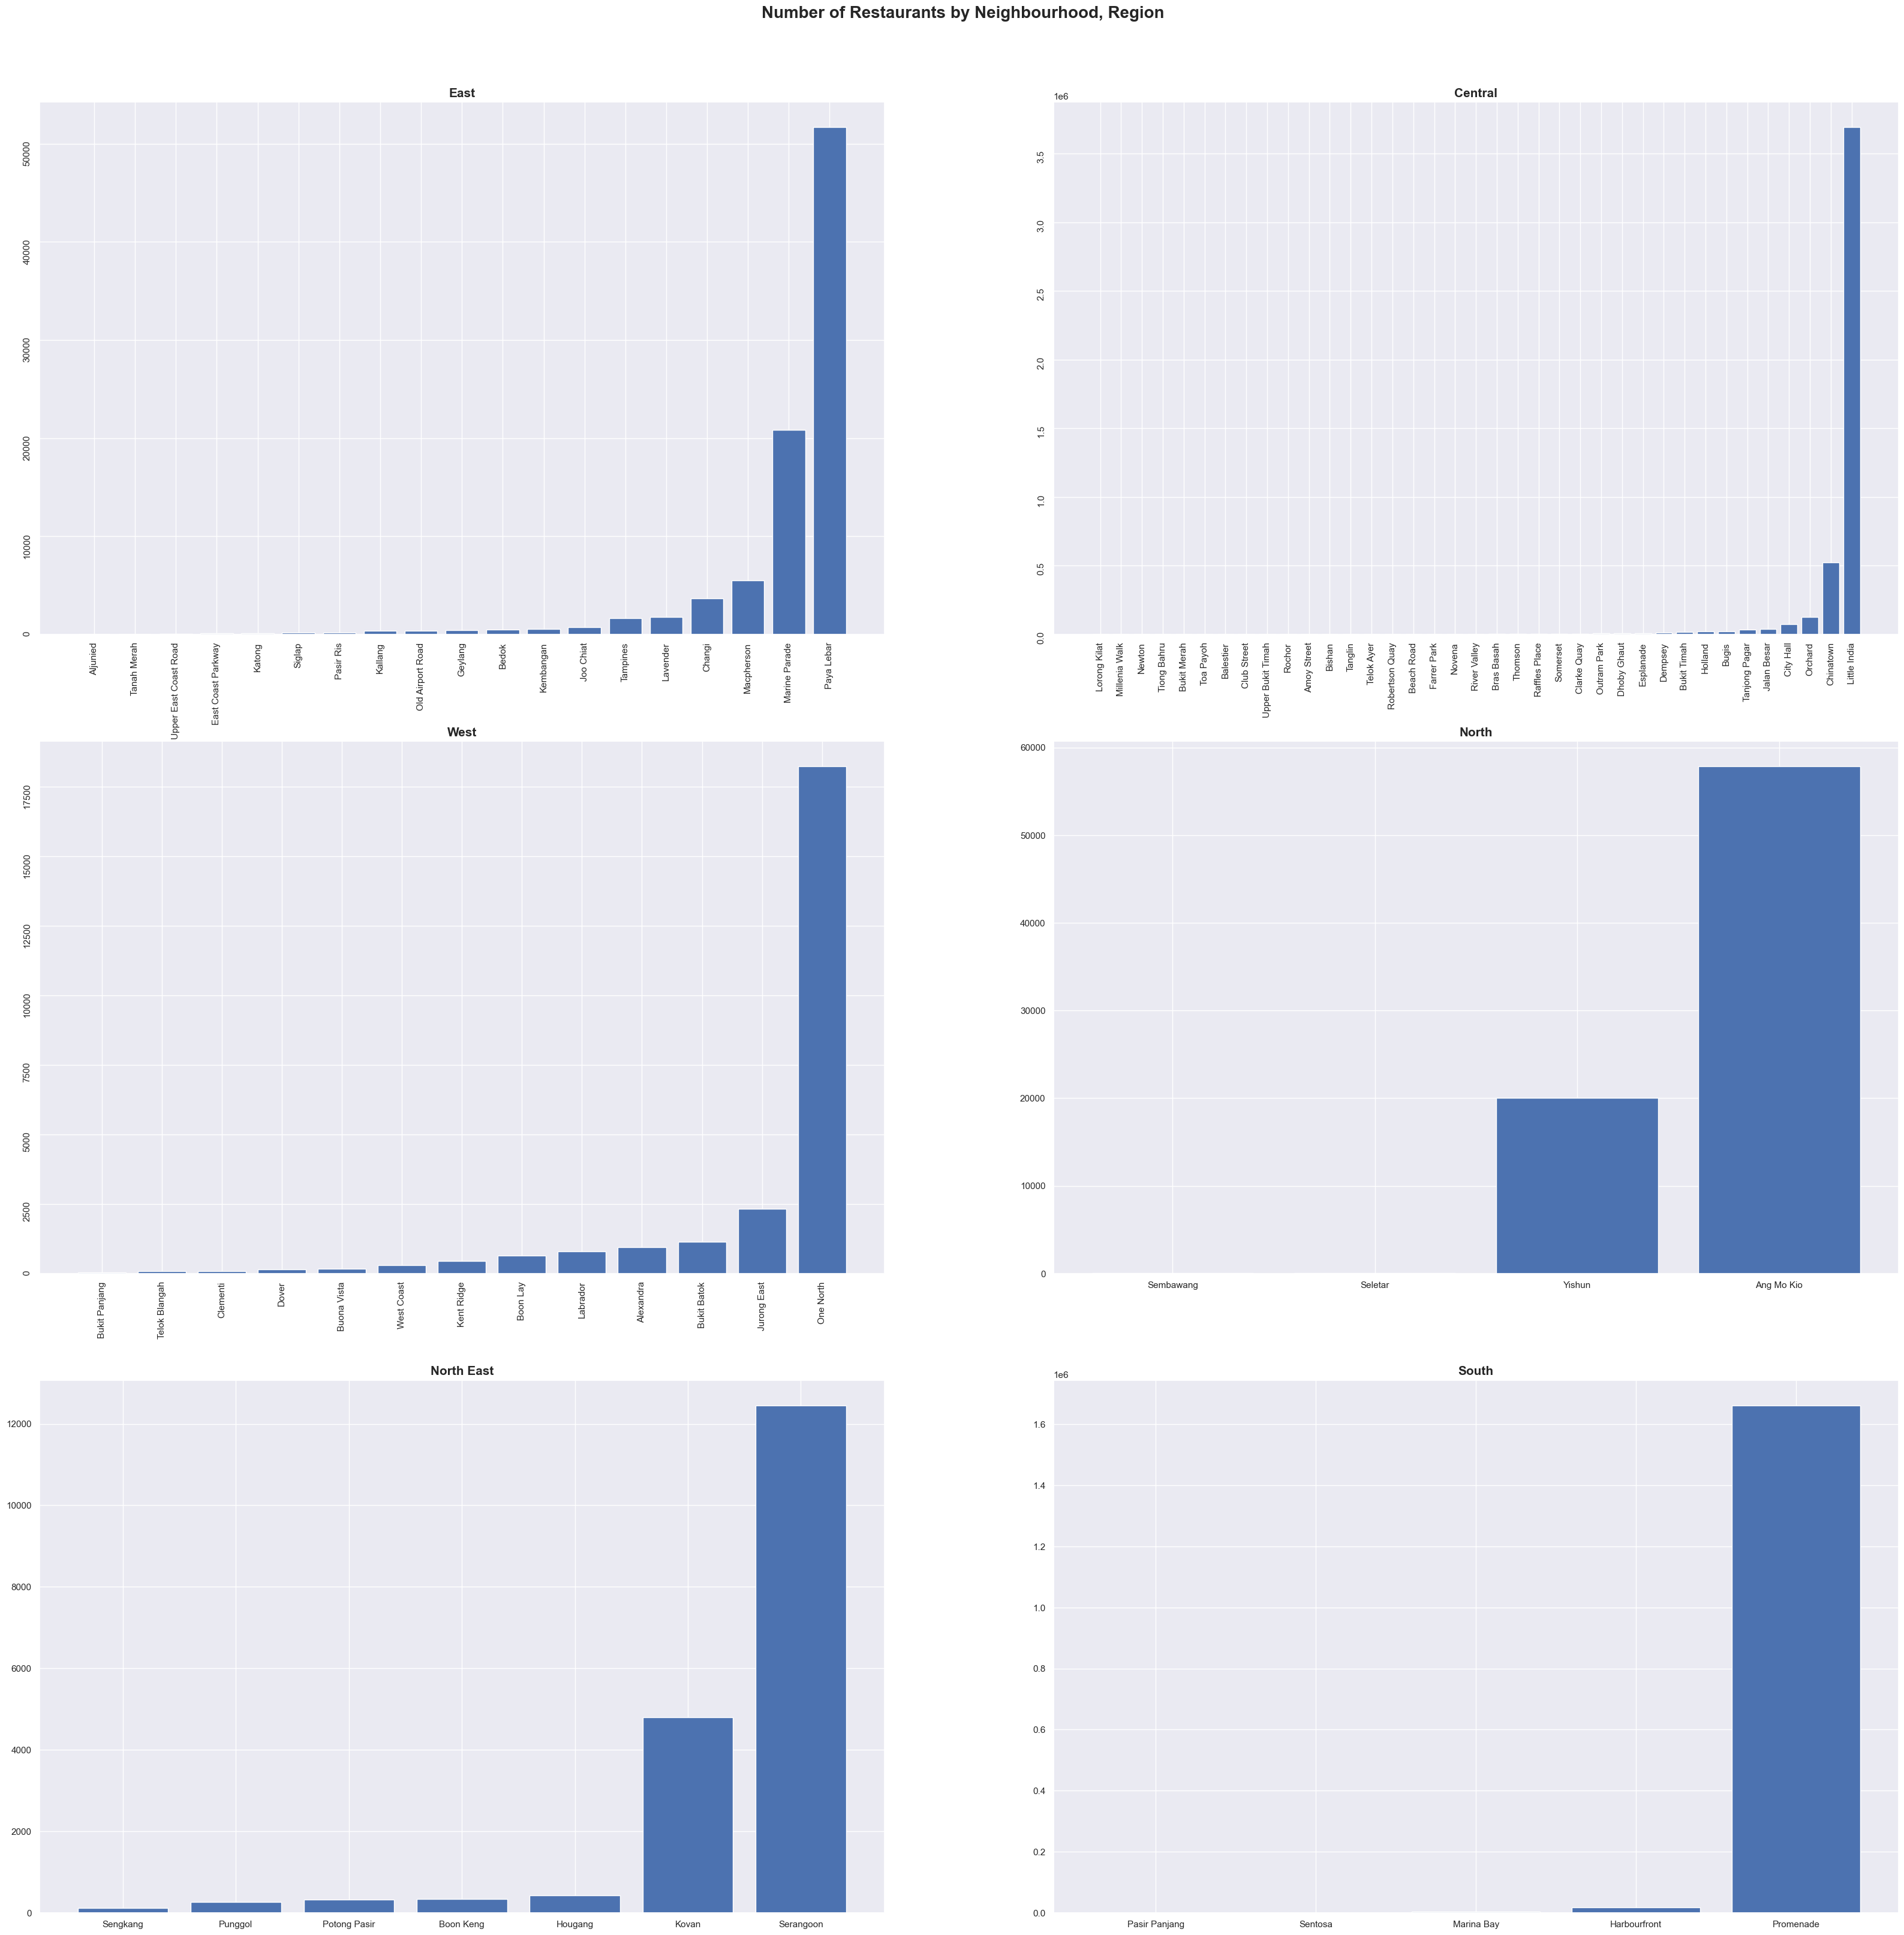

In [228]:
fig, axs = plt.subplots(3,2, figsize=(40, 40))
axs[0][0].bar(num_reviews_by_neighbourhood_East['neighbourhood'], num_reviews_by_neighbourhood_East['url'])
axs[0][1].bar(num_reviews_by_neighbourhood_Central['neighbourhood'], num_reviews_by_neighbourhood_Central['url'])
axs[1][0].bar(num_reviews_by_neighbourhood_West['neighbourhood'], num_reviews_by_neighbourhood_West['url'])
axs[1][1].bar(num_reviews_by_neighbourhood_North['neighbourhood'], num_reviews_by_neighbourhood_North['url'])
axs[2][0].bar(num_reviews_by_neighbourhood_NE['neighbourhood'], num_reviews_by_neighbourhood_NE['url'])
axs[2][1].bar(num_reviews_by_neighbourhood_South['neighbourhood'], num_reviews_by_neighbourhood_South['url'])

fig.suptitle('Number of Restaurants by Neighbourhood, Region', fontsize=20, fontweight='extra bold', y=0.92, x=0.51)
axs[0][0].set_title('East', fontsize=15, fontweight='bold')
axs[0][0].tick_params(labelrotation = 90)

axs[0][1].set_title('Central', fontsize=15, fontweight='bold')
axs[0][1].tick_params(labelrotation = 90)

axs[1][0].set_title('West', fontsize=15, fontweight='bold')
axs[1][0].tick_params(labelrotation = 90)

axs[1][1].set_title('North', fontsize=15, fontweight='bold')
axs[2][0].set_title('North East', fontsize=15, fontweight='bold')
axs[2][1].set_title('South', fontsize=15, fontweight='bold')


#### Bar Chart of Reviews by Region

In [229]:
num_reviews_by_region = pd.DataFrame(cleaned_data.groupby('region')['url'].count()).reset_index().sort_values('url')

Text(0.5, 1.0, 'Number of Reviews by Region')

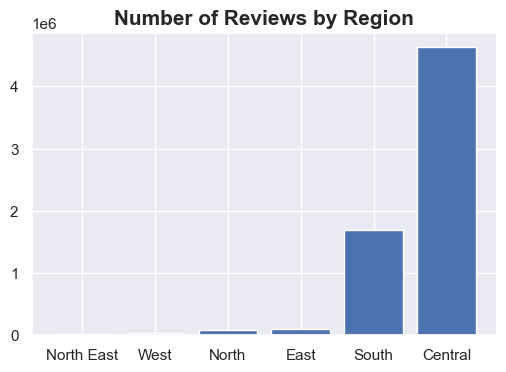

In [230]:
plt.bar(num_reviews_by_region['region'],num_reviews_by_region['url'])
plt.title('Number of Reviews by Region', fontsize=15, fontweight='bold')

#### Bar Chart of Restaurants by Category

In [9]:
rest_cat_df = cleaned_data.iloc[:, cleaned_data.columns.get_loc('Argentinian'):-1]
rest_cat_df['url'] = cleaned_data['url']


In [10]:
rest_cat_counts = rest_cat_df.drop_duplicates(['url'])
rest_cat_counts = pd.DataFrame(rest_cat_counts.sum()).reset_index().iloc[:-1,:].sort_values(0)

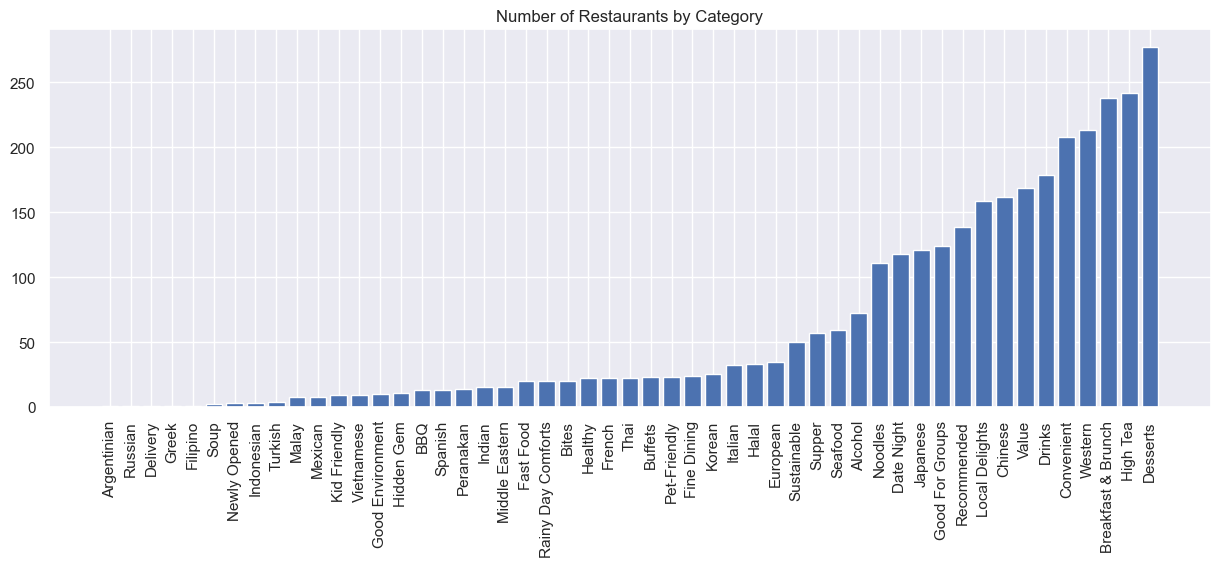

In [11]:
plt.figure(figsize=(15,5))
plt.bar(rest_cat_counts['index'], rest_cat_counts[0])
plt.xticks(rotation = 90)
plt.title('Number of Restaurants by Category')
plt.show()

#### Bar Chart of Restaurants by Category

In [3]:
cleaned_data = pd.read_csv('cleaned_restaurant_reviews.csv')

In [12]:
rest_cat_df.sum()

In [10]:
reviews_cat_df = pd.DataFrame(rest_cat_df.sum()).reset_index().iloc[:-1,:].sort_values(0)

In [ ]:
rest_cat_df.sum()